# 1. 데이터 선정 이유 및 문제 정의

## 1.1 시나리오
- 코로나로 인해 최근 몇 년 간 항공 산업이 많이 침체되었으나 최근 다시 활발해지려고 함
- 항공 산업의 침체로 인해 적자가 누적된 상황에서 항공사는 최대한 손실 발생을 줄이고 싶음

## 1.2 문제 해결의 필요성
- 만약 항공기가 결항된다면 탑승 예정이었지만 공항에 남게되는 고객들이 대거 발생하게 됨. 이 경우 공항은 갈 곳 잃은 고객들로 인해 붐빌 것이고, 항공사는 고객에게 피해보상을 해야 할 것이고, 고객은 공항에서 시간을 낭비하는 등 손실비용이 발생함
    - 항공사는 소비자 피해보상, 항공기 운행 손실 등의 타격을 입을 것임
- 항공기의 결항을 예측할 수 있다면 공항이나 항공사 측에서 사전에 대비하여 손실을 최소화하는 데 도움이 될 것임
- 또한 고객은 사전에 지연 정보를 알게 된다면 다른 항공기로 바꾸는 등 공항에서 버리는 시간을 줄일 수 있을 것으로 예상

## 1.3 모델 정의
- 항공기의 결항을 예측하는 이진 분류 모델
- 모델에 사용할 데이터는 캐글의 ‘2015 Flight Delays and Cancellations’임
    - 데이터는 2015년 미국 모든 국내선의 항공 데이터임
- 타겟은 항공기 결항 여부임
    - 0: 항공기 출항 / 1: 항공기 결항

### 1.3.1 해당 특성을 타겟으로 선정한 이유는?
- 항공기의 결항 여부를 예측할 수 있으면 손실 발생을 최소화할 수 있음
- 항공기 착륙 지연 여부도 예측할 수 있다면 좋지만 착륙 지연될 가능성이 있다고 해서 항공사측에서 항공기 운행을 취소하지는 않을 것임
- 따라서 항공사 운영에 더 도움이 되는 항공기 결항 여부를 타겟으로 선정함

## 1.4 가설
- 항공기가 결항되는 주된 원인은 항공사/수화물과 관련 있다.
- 항공기가 결항되는 특정 요일이 있다.
- 항공기가 결항될 확률이 높은 특정 공항/항공사가 있다.

### 1.4.1 내가 세운 가설이 의미가 있는가?
- 항공기가 결항될 확률이 높음을 아는 것과 모르는 것에는 큰 차이가 있음
- 결항될 가능성이 높은 날은 항공사든 공항이든 특히 주의를 기울여 조치를 취할 수 있기에 어떤 식으로든 손실이 줄어들 것임

---

# 2. 데이터 EDA, 전처리, 시각화

## 2.1 데이터 둘러보기(구조 탐색)

In [1]:
import pandas as pd

In [2]:
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

/Users/hanjaewon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 2.1.1 파일별 용도 파악

In [3]:
flights.head() #날짜별 항공기 운행 데이터

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
airlines.head() #항공사 데이터

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
airports.head() #공항 데이터

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


### 중복되는 칼럼
- flights['AIRLINE'] == airlines['IATA_CODE']
- flights['*_AIRPORT'] == airports['IATA_CODE']

### 2.1.2 데이터 양(레코드 수, 피처 수)

In [6]:
flights.shape, airlines.shape, airports.shape #데이터 크기

((5819079, 31), (14, 2), (322, 7))

### 2.1.3 데이터 분할(train, val, test)
- flights 데이터는 시계열 데이터임
- train과 test의 비율은 8:2로 나눌 것임
- 시계열이기에 앞에서부터 80%는 train, 뒤의 20%는 test 데이터로 할당

In [7]:
from sklearn.model_selection import train_test_split

df = flights.copy()
df = df.iloc[:150000,:]

target = 'CANCELLED'
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)

#test 데이터에서 타겟 제거
test.drop(columns=target, inplace=True)
train.shape, test.shape

/Users/hanjaewon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((120000, 31), (30000, 30))

In [8]:
#train 데이터와 test 데이터의 레코드 수의 합은 flights 데이터의 레코드 수와 같은가? - 같음
assert train.shape[0] + test.shape[0] == df.shape[0]

- train과 val의 비율 역시 8:2로 나눌 것임
- 마찬가지로 시계열이기에 앞에서부터 80%는 train, 뒤의 20%는 val 데이터로 할당

In [9]:
df1 = train.copy()
train, val = train_test_split(df1, train_size=0.80, test_size=0.20, 
                              stratify=df1[target], random_state=2)
#val.drop(columns=target, inplace=True)
train.shape, val.shape, test.shape

((96000, 31), (24000, 31), (30000, 30))

In [10]:
#train 데이터와 val 데이터의 레코드 수의 합은 원래 train 데이터의 레코드 수와 같은가? - 같음
assert train.shape[0] + val.shape[0] == df1.shape[0]

### 2.1.4 피처 이해(이름, 의미, 데이터 타입, 결측값 개수, 고윳값 개수, 실제값, 데이터 종류 등)

In [11]:
'''
<flights 피처 설명>
    YEAR                   int64      연도
    MONTH                  int64      월
    DAY                    int64      일
    DAY_OF_WEEK            int64      요일(월:1, 화:2, 수:3, 목:4, 금:5, 토:6, 일:7)
    AIRLINE                object     항공사 식별코드
    FLIGHT_NUMBER          int64      항공편 식별코드
    TAIL_NUMBER            object     항공기 식별코드
    ORIGIN_AIRPORT         object     출발지 공항
    DESTINATION_AIRPORT    object     목적지 공항
    SCHEDULED_DEPARTURE    int64      출발 예정 시간
    DEPARTURE_TIME         float64    출발 시간('WHEEL_OFF - TAXI_OUT')
    DEPARTURE_DELAY        float64    출발 지연된 시간 총합
    TAXI_OUT               float64    출발 공항 게이트에서 바퀴가 뜰 때까지 걸리는 시간
    WHEELS_OFF             float64    항공기 바퀴가 지면에서 떨어지는 시점
    SCHEDULED_TIME         float64    비행 계획 시간
    ELAPSED_TIME           float64    경과 시간('AIR_TIME + TAXI_IN + TAXI_OUT')
    AIR_TIME               float64    공중에 떠 있는 시간('WHEELS OFF'와 'WHEELS ON' 사이 시간)
    DISTANCE               int64      두 공항 사이 거리
    WHEELS_ON              float64    항공기 바퀴가 지면에 닿는 시점
    TAXI_IN                float64    목적지 공항 게이트에 바퀴가 닿을 때까지 걸리는 시간
    SCHEDULED_ARRIVAL      int64      도착 예정 시간
    ARRIVAL_TIME           float64    도착 시간('WHEELS_ON + TAXI_IN')
    ARRIVAL_DELAY          float64    도착 지연된 시간('ARRIVAL_TIME - SCHEDULED_ARRIVAL')
    DIVERTED               int64      항공기 착륙 지연 여부(0: 지연X, 1: 지연됨)
    CANCELLED              int64      항공기 결항 여부(0: 결항X, 1: 결항됨)
    CANCELLATION_REASON    object     항공기 결항 사유(A: 항공사/수화물, B: 날씨, C: 국내 기류 문제, D: 보안)
    AIR_SYSTEM_DELAY       float64    기류 문제로 인한 지연
    SECURITY_DELAY         float64    보안으로 인한 지연
    AIRLINE_DELAY          float64    항공사로 인한 지연
    LATE_AIRCRAFT_DELAY    float64    항공기로 인한 지연
    WEATHER_DELAY          float64    날씨로 인한 지연
    
<airlines 피처 설명>
    IATA_CODE              object     항공사 식별코드
    AIRLINE                object     항공사 이름

<airports 피처 설명>
    IATA_CODE              object     공항 식별코드
    AIRPORT                object     공항 이름
    CITY                   object     도시
    STATE                  object     주
    COUNTRY                object     나라(미국)
    LATITUDE               float64    공항의 위도
    LONGITUDE              float64    공항의 경도
'''

"\n<flights 피처 설명>\n    YEAR                   int64      연도\n    MONTH                  int64      월\n    DAY                    int64      일\n    DAY_OF_WEEK            int64      요일(월:1, 화:2, 수:3, 목:4, 금:5, 토:6, 일:7)\n    AIRLINE                object     항공사 식별코드\n    FLIGHT_NUMBER          int64      항공편 식별코드\n    TAIL_NUMBER            object     항공기 식별코드\n    ORIGIN_AIRPORT         object     출발지 공항\n    DESTINATION_AIRPORT    object     목적지 공항\n    SCHEDULED_DEPARTURE    int64      출발 예정 시간\n    DEPARTURE_TIME         float64    출발 시간('WHEEL_OFF - TAXI_OUT')\n    DEPARTURE_DELAY        float64    출발 지연된 시간 총합\n    TAXI_OUT               float64    출발 공항 게이트에서 바퀴가 뜰 때까지 걸리는 시간\n    WHEELS_OFF             float64    항공기 바퀴가 지면에서 떨어지는 시점\n    SCHEDULED_TIME         float64    비행 계획 시간\n    ELAPSED_TIME           float64    경과 시간('AIR_TIME + TAXI_IN + TAXI_OUT')\n    AIR_TIME               float64    공중에 떠 있는 시간('WHEELS OFF'와 'WHEELS ON' 사이 시간)\n    DISTANCE               int64    

In [12]:
#결측치 확인
train.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              207
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2496
DEPARTURE_DELAY         2496
TAXI_OUT                2574
WHEELS_OFF              2574
SCHEDULED_TIME             0
ELAPSED_TIME            2842
AIR_TIME                2842
DISTANCE                   0
WHEELS_ON               2672
TAXI_IN                 2672
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2672
ARRIVAL_DELAY           2842
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    93401
AIR_SYSTEM_DELAY       65918
SECURITY_DELAY         65918
AIRLINE_DELAY          65918
LATE_AIRCRAFT_DELAY    65918
WEATHER_DELAY          65918
dtype: int64

In [13]:
airlines.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [14]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

- flights 결측치는 대부분 1~2%라 무시 가능하지만
- 항공기 취소 사유에 해당되는 피처는 결측치가 82~98% -> 무시 불가
- airports 결측치는 0.9% -> 무시 가능

In [15]:
#object 타입의 변수의 고유값 확인
unicols = ['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
for i in unicols:
    print(f'{i}: {train[i].unique()}\n')

AIRLINE: ['DL' 'AA' 'US' 'WN' 'OO' 'NK' 'HA' 'MQ' 'UA' 'EV' 'B6' 'AS' 'VX' 'F9']

TAIL_NUMBER: ['N912DN' 'N434AA' 'N203UW' ... 'N77019' 'N27903' 'N652UA']

ORIGIN_AIRPORT: ['MSP' 'JAX' 'CLT' 'ATL' 'BNA' 'SMF' 'IAH' 'DFW' 'MIA' 'DTW' 'ITO' 'BDL'
 'IND' 'MCO' 'PHL' 'ORD' 'LAX' 'LAS' 'AUS' 'MKE' 'ABQ' 'PHX' 'BWI' 'EWR'
 'TUS' 'SNA' 'BOS' 'GJT' 'GCK' 'DEN' 'SJC' 'BTR' 'ABE' 'PDX' 'SJU' 'TPA'
 'SFO' 'MCI' 'SEA' 'LIT' 'BFL' 'MSY' 'GSP' 'CMH' 'SWF' 'SAN' 'AEX' 'OAK'
 'HOU' 'PWM' 'MDW' 'RST' 'PIT' 'EVV' 'DAL' 'CLE' 'OKC' 'FLL' 'BUR' 'LGA'
 'DCA' 'SAT' 'SLC' 'PSP' 'ASE' 'MGM' 'OGG' 'FAT' 'IAD' 'OMA' 'MFR' 'SIT'
 'TYS' 'PBG' 'SDF' 'XNA' 'STL' 'CHS' 'BUF' 'LRD' 'PBI' 'GRK' 'LBB' 'BIS'
 'EKO' 'CVG' 'BRD' 'JFK' 'GRR' 'GSO' 'RDD' 'ELP' 'BTM' 'RSW' 'RDU' 'CAE'
 'TTN' 'CAK' 'AVL' 'KOA' 'PNS' 'ACY' 'TUL' 'BZN' 'PIA' 'CPR' 'HNL' 'ACT'
 'DSM' 'HRL' 'VPS' 'BHM' 'ATW' 'GTF' 'ONT' 'HPN' 'TXK' 'LGB' 'ECP' 'RNO'
 'BIL' 'ALB' 'LIH' 'BOI' 'STT' 'FNT' 'COS' 'MAF' 'MEM' 'SBA' 'CID' 'SMX'
 'GRB' 'CMI' 'ANC' 'PVD' 

In [16]:
#object 타입의 변수의 고유값 갯수 확인
for i in unicols:
    print(f'{i}: {train[i].nunique()}\n')

AIRLINE: 14

TAIL_NUMBER: 4219

ORIGIN_AIRPORT: 312

DESTINATION_AIRPORT: 312



### 2.1.5 판다스 프로파일링

In [17]:
!pip install pandas-profiling

In [18]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, minimal=True).to_notebook_iframe()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- 2015년의 항공기 운행 정보 데이터이기 때문에 값이 전부 2015인 'YEAR'은 필요 없어 보임
- 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT' 피처는 높은 카디널리티를 보임

## 2.2 전처리
### 2.2.1 Feature Engineering

In [19]:
def engineering(data):
    #필요없는 특성 제거
    dels = ['WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
            'YEAR', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME',
            'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    data.drop(columns=dels, axis=1, inplace=True)
    
    
    #결측치 처리
    ##대부분 2% 정도의 결측치라 없는 셈으로 침 (결항 사유 피처는 결항(1)에 한해선 결측치 없음)
    data.fillna(0, inplace=True)
    data['TAIL_NUMBER'] = data['TAIL_NUMBER'].astype(str)
    data['SCHEDULED_TIME'] = data['SCHEDULED_TIME'].astype(float)
    data['DEPARTURE_TIME'] = data['DEPARTURE_TIME'].astype(float)
    data['DEPARTURE_DELAY'] = data['DEPARTURE_DELAY'].astype(float)
    data['CANCELLATION_REASON'] = data['CANCELLATION_REASON'].astype(str)
    
    return data

train = engineering(train)
val = engineering(val)
test = engineering(test)

train.shape, val.shape, test.shape

/Users/hanjaewon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/hanjaewon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/var/folders/kk/bj47wh1s52915s1gb33by7lr0000gn/T/ipykernel_27079/221954600.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

((96000, 16), (24000, 16), (30000, 15))

In [20]:
#결측치 재확인
train.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

In [21]:
val.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

In [22]:
test.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
DIVERTED               0
CANCELLATION_REASON    0
dtype: int64

## 2.3 피처, 타겟 분리

In [23]:
target

'CANCELLED'

In [24]:
#데이터에서 타겟과 특성 분리
features = train.drop(columns=[target]).columns

#훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [25]:
'''
<X_train 피처 설명>
    MONTH                  int64      월
    DAY                    int64      일
    DAY_OF_WEEK            int64      요일(월:1, 화:2, 수:3, 목:4, 금:5, 토:6, 일:7)
    AIRLINE                object     항공사 식별코드
    FLIGHT_NUMBER          int64      항공편 식별코드
    TAIL_NUMBER            object     항공기 식별코드
    ORIGIN_AIRPORT         object     출발지 공항
    DESTINATION_AIRPORT    object     목적지 공항
    SCHEDULED_DEPARTURE    int64      출발 예정 시간
    DEPARTURE_TIME         float64    출발 시간('WHEEL_OFF - TAXI_OUT')
    DEPARTURE_DELAY        float64    출발 지연된 시간 총합
    SCHEDULED_TIME         float64    비행 계획 시간
    DISTANCE               int64      두 공항 사이 거리
    DIVERTED               int64      항공기 착륙 지연 여부(0: 지연X, 1: 지연됨)
    CANCELLATION_REASON    object     항공기 결항 사유(A: 항공사/수화물, B: 날씨, C: 국내 기류 문제, D: 보안)
'''

"\n<X_train 피처 설명>\n    MONTH                  int64      월\n    DAY                    int64      일\n    DAY_OF_WEEK            int64      요일(월:1, 화:2, 수:3, 목:4, 금:5, 토:6, 일:7)\n    AIRLINE                object     항공사 식별코드\n    FLIGHT_NUMBER          int64      항공편 식별코드\n    TAIL_NUMBER            object     항공기 식별코드\n    ORIGIN_AIRPORT         object     출발지 공항\n    DESTINATION_AIRPORT    object     목적지 공항\n    SCHEDULED_DEPARTURE    int64      출발 예정 시간\n    DEPARTURE_TIME         float64    출발 시간('WHEEL_OFF - TAXI_OUT')\n    DEPARTURE_DELAY        float64    출발 지연된 시간 총합\n    SCHEDULED_TIME         float64    비행 계획 시간\n    DISTANCE               int64      두 공항 사이 거리\n    DIVERTED               int64      항공기 착륙 지연 여부(0: 지연X, 1: 지연됨)\n    CANCELLATION_REASON    object     항공기 결항 사유(A: 항공사/수화물, B: 날씨, C: 국내 기류 문제, D: 보안)\n"

## 2.4 타깃 분포 확인

In [26]:
y_train.value_counts(normalize=True)

0    0.972927
1    0.027073
Name: CANCELLED, dtype: float64

In [27]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

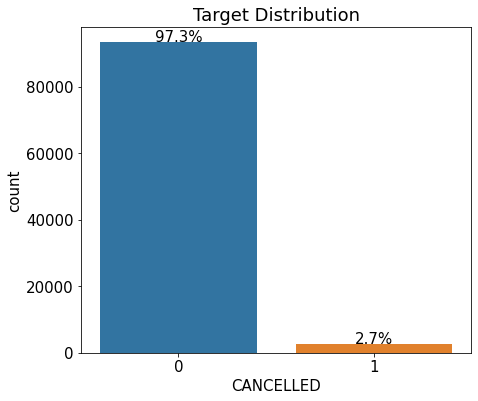

In [28]:
#타깃값 분포 카운트플롯

def write_percent(ax, total_size):
    #도형 객체를 순회하며 막대 상단에 타깃값 비율 표시
    for patch in ax.patches:
        height = patch.get_height()   #도형 높이(데이터 개수)
        width = patch.get_width()   #도형 너비
        left_coord = patch.get_x()   #도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100   #타깃값 비율
        
        #(x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,   #x축 위치
                y=height + total_size*0.001,   #y축 위치
                s=f'{percent:1.1f}%',   #입력 텍스트
                ha='center')   #가운데 정렬

mpl.rc('font', size=15) #폰트 크기 설정
plt.figure(figsize=(7,6)) #Figure 크기 설정
ax = sns.countplot(x=target, data=train)
write_percent(ax, len(train)) #비율 표시
ax.set_title('Target Distribution');

- 데이터의 분포가 엄청 불균형한 편

## 2.5 데이터 분포 확인 및 시각화, 가설 검증
### 2.5.1 데이터 분포 확인 및 시각화

In [29]:
#수치형 데이터 통계
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,96000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DAY,96000.0,5.313844,2.727840,1.0,3.0,5.0,8.0,10.0
DAY_OF_WEEK,96000.0,4.218917,1.811769,1.0,3.0,4.0,6.0,7.0
FLIGHT_NUMBER,96000.0,2257.724948,1816.191902,1.0,759.0,1712.0,3462.0,7438.0
SCHEDULED_DEPARTURE,96000.0,1313.881615,473.000176,5.0,915.0,1310.0,1715.0,2359.0
DEPARTURE_TIME,96000.0,1298.130854,529.730588,0.0,905.0,1312.0,1727.0,2400.0
DEPARTURE_DELAY,96000.0,17.707583,44.005690,-42.0,-3.0,1.0,21.0,1255.0
SCHEDULED_TIME,96000.0,141.444573,75.208923,23.0,85.0,124.0,175.0,718.0
DISTANCE,96000.0,815.863760,600.471702,31.0,372.0,651.0,1056.0,4983.0
DIVERTED,96000.0,0.002531,0.050248,0.0,0.0,0.0,0.0,1.0


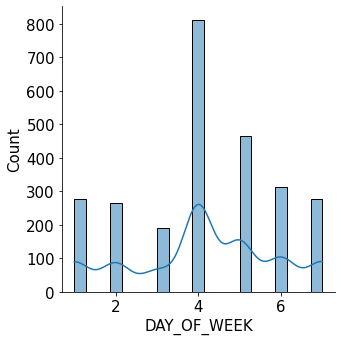

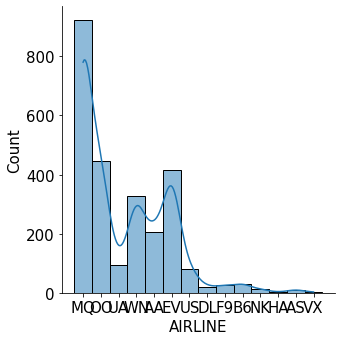

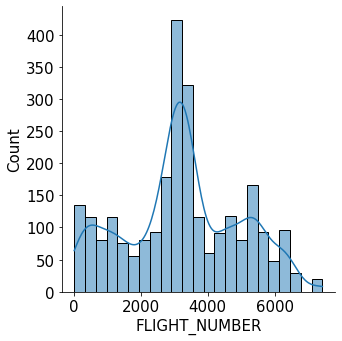

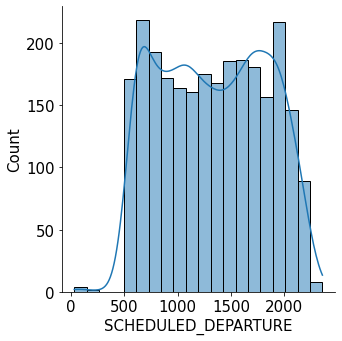

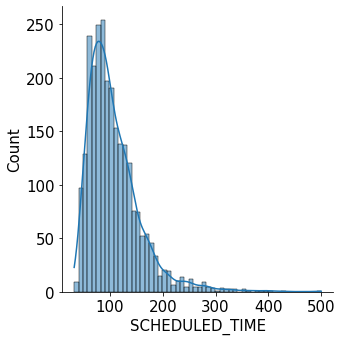

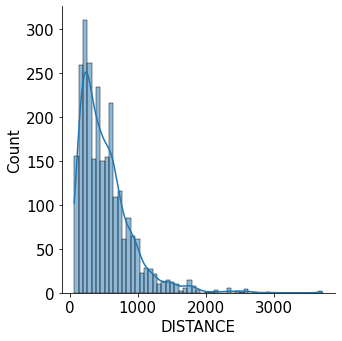

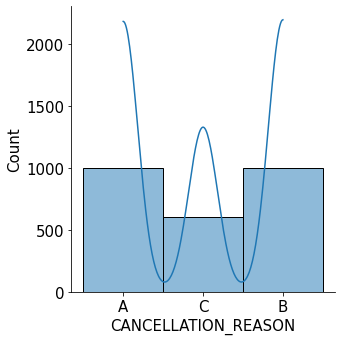

In [30]:
cancelled = train[train['CANCELLED']==1]

cols = ['DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE', 'CANCELLATION_REASON']
for col in train[cols]:
    sns.displot(cancelled[col],kde=True);

### 2.5.2 가설 검증

### - 항공기가 결항되는 주된 원인은 항공사/수화물과 관련 있다.

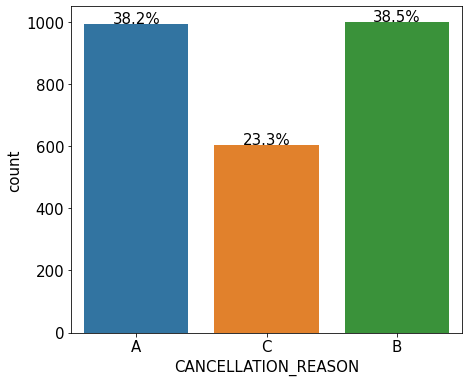

In [31]:
mpl.rc('font', size=15) #폰트 크기 설정
plt.figure(figsize=(7,6)) #Figure 크기 설정
ax = sns.countplot(x='CANCELLATION_REASON', data=cancelled);
write_percent(ax, len(cancelled)) #비율 표시

- B(날씨)로 인한 결항이 제일 많고, A(항공사/수화물 문제), C(국내 기류 문제)가 그 뒤를 따른다.
- 가설1 기각

### - 항공기가 결항되는 특정 요일이 있다.

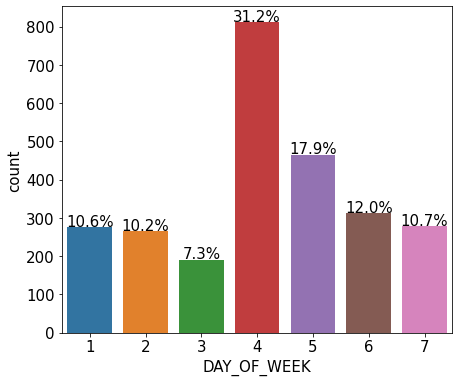

In [32]:
mpl.rc('font', size=15) #폰트 크기 설정
plt.figure(figsize=(7,6)) #Figure 크기 설정
ax = sns.countplot(x='DAY_OF_WEEK', data=cancelled);
write_percent(ax, len(cancelled)) #비율 표시

- 주로 월요일에 많이 결항됨을 알 수 있다.

### - 항공기가 결항될 확률이 높은 특정 공항/ 항공사가 있다.

In [33]:
#공항별 항공기 결항 횟수
cancelled.groupby('ORIGIN_AIRPORT')['CANCELLED'].value_counts().sort_values(ascending=False).head(20)

ORIGIN_AIRPORT  CANCELLED
ORD             1            444
DFW             1            209
LGA             1            105
DEN             1            100
MDW             1             88
DCA             1             56
SFO             1             42
DTW             1             39
EWR             1             38
ATL             1             35
LAX             1             33
MAF             1             31
MSP             1             27
BWI             1             26
CLE             1             25
BOS             1             25
STL             1             23
IAH             1             23
MKE             1             22
DSM             1             21
Name: CANCELLED, dtype: int64

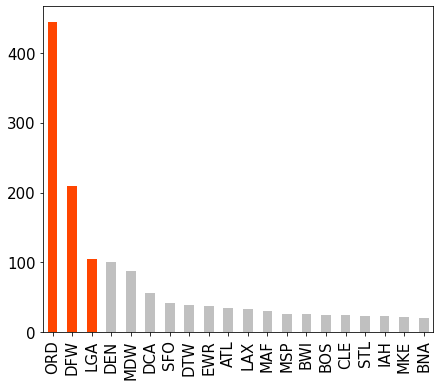

In [34]:
mpl.rc('font', size=15) #폰트 크기 설정
plt.figure(figsize=(7,6)) #Figure 크기 설정

cancelled['ORIGIN_AIRPORT'].value_counts()[:20].plot(kind='bar',
                                                   color=['orangered','orangered','orangered','silver','silver','silver'
                                                         ,'silver','silver','silver','silver','silver','silver'
                                                         ,'silver','silver','silver','silver','silver','silver'
                                                         ,'silver','silver']);

In [35]:
#항공사별 항공기 결항 횟수
cancelled.groupby('AIRLINE')['CANCELLED'].value_counts().sort_values(ascending=False).head(20)

AIRLINE  CANCELLED
MQ       1            923
OO       1            447
EV       1            415
WN       1            328
AA       1            206
UA       1             95
US       1             81
B6       1             31
F9       1             25
DL       1             21
NK       1             12
AS       1             11
HA       1              2
VX       1              2
Name: CANCELLED, dtype: int64

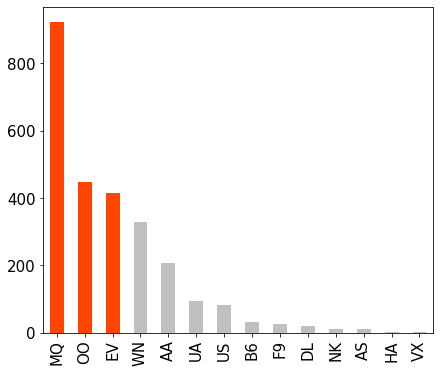

In [36]:
mpl.rc('font', size=15) #폰트 크기 설정
plt.figure(figsize=(7,6)) #Figure 크기 설정

cancelled['AIRLINE'].value_counts()[:20].plot(kind='bar',
                                                   color=['orangered','orangered','orangered','silver','silver','silver'
                                                         ,'silver','silver','silver','silver','silver','silver'
                                                         ,'silver','silver','silver','silver','silver','silver'
                                                         ,'silver','silver']);

- 항공기가 결항될 확률이 높은 공항이 있다.
    - ORD, DFW, LGA 공항

- 항공기가 결항될 확률이 높은 항공사가 있다.
    - MQ, WN, EV 항공사

---

# 3. 모델링 및 모델 해석
## 3.1 baseline 모델 선정
- 타겟의 최빈값 모델

In [53]:
#데이터에서 타겟과 특성 분리
features = train.drop(columns=[target, 'CANCELLATION_REASON']).columns

#훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [54]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

#타겟의 최빈값
major = y_train.mode()[0]

#타겟 샘플 수 만큼 0이 담긴 리스트. 기준모델로 예측
y_train_pred = [major]*len(y_train)
y_val_pred = [major]*len(y_val)

#기준모델 평가지표
base_train_accuracy = accuracy_score(y_train, y_train_pred)
base_train_f1 = f1_score(y_train, y_train_pred)
base_val_accuracy = accuracy_score(y_val, y_val_pred)
base_val_f1 = f1_score(y_val, y_val_pred)
base_auc_score = roc_auc_score(y_val, y_val_pred)

print('기준 모델 훈련 정확도: ', base_train_accuracy)
print('기준 모델 훈련 f1 score: ', base_train_f1)
print('기준 모델 검증 정확도: ', base_val_accuracy)
print('기준 모델 검증 f1 score: ', base_val_f1)
print('기준 모델 검증 auc score: ', base_auc_score)
print('\n')
print(classification_report(y_val, y_val_pred))

기준 모델 훈련 정확도:  0.9729270833333333
기준 모델 훈련 f1 score:  0.0
기준 모델 검증 정확도:  0.9729166666666667
기준 모델 검증 f1 score:  0.0
기준 모델 검증 auc score:  0.5


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     23350
           1       0.00      0.00      0.00       650

    accuracy                           0.97     24000
   macro avg       0.49      0.50      0.49     24000
weighted avg       0.95      0.97      0.96     24000



## 3.2 모델 생성
### 3.2.1 로지스틱 회귀 모델

In [38]:
!pip install category_encoders

In [39]:
X_train.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLATION_REASON
15670,1,2,5,DL,1443,N912DN,MSP,PHX,700,657.0,-3.0,214.0,1276,0,0
11210,1,1,4,AA,386,N434AA,JAX,DFW,1825,2026.0,121.0,170.0,918,0,0
28989,1,2,5,US,1920,N203UW,CLT,BWI,2005,2015.0,10.0,79.0,361,0,0
112212,1,8,4,US,1836,N187US,ATL,PHX,745,737.0,-8.0,275.0,1587,0,0
67836,1,5,1,WN,2161,N450WN,BNA,CMH,1030,1027.0,-3.0,70.0,337,0,0


In [40]:
X_val.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLATION_REASON
140800,1,9,5,US,1838,N946UW,PHL,PIT,2030,2049.0,19.0,73.0,268,0,0
96234,1,7,3,WN,608,N771SA,PHL,MCO,720,719.0,-1.0,170.0,861,0,0
27322,1,2,5,EV,3959,N12126,DEN,CLE,1822,1848.0,26.0,169.0,1201,0,0
23233,1,2,5,OO,5166,N924SW,DEN,BIS,1423,1521.0,58.0,97.0,516,0,0
2089,1,1,4,US,690,N207UW,PHX,HNL,835,835.0,0.0,405.0,2917,0,0


In [55]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape

((96000, 14), (24000, 14), (30000, 14), (96000,), (24000,))

In [56]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#파이프라인 생성
pipe_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

pipe_lr.fit(X_train, y_train)
lr_pred = pipe_lr.predict(X_val)

#로지스틱 회귀 모델 평가지표
lr_train_accuracy = pipe_lr.score(X_train, y_train)
lr_val_accuracy = pipe_lr.score(X_val, y_val)
lr_f1 = f1_score(y_val, lr_pred)
lr_auc_score = roc_auc_score(y_val, lr_pred)

print('로지스틱 회귀 모델 훈련 정확도: ', lr_train_accuracy)
print('로지스틱 회귀 모델 검증 정확도: ', lr_val_accuracy)
print('로지스틱 회귀 모델 f1 score: ', lr_f1)
print('로지스틱 회귀 모델 auc score: ', lr_auc_score)
print('\n')
print(classification_report(y_val, lr_pred))

로지스틱 회귀 모델 훈련 정확도:  0.9985208333333333
로지스틱 회귀 모델 검증 정확도:  0.9924166666666666
로지스틱 회귀 모델 f1 score:  0.856012658227848
로지스틱 회귀 모델 auc score:  0.9145906769889638


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23350
           1       0.88      0.83      0.86       650

    accuracy                           0.99     24000
   macro avg       0.94      0.91      0.93     24000
weighted avg       0.99      0.99      0.99     24000



### 3.2.2 랜덤포레스트 모델

In [57]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder

pipe_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier()
)

pipe_rf.fit(X_train, y_train)
rf_pred = pipe_rf.predict(X_val)

#랜덤포레스트 모델 평가지표
rf_train_accuracy = pipe_rf.score(X_train, y_train)
rf_val_accuracy = pipe_rf.score(X_val, y_val)
rf_f1 = f1_score(y_val, rf_pred)
rf_auc_score = roc_auc_score(y_val, rf_pred)

print('랜덤포레스트 모델 훈련 정확도: ', rf_train_accuracy)
print('랜덤포레스트 모델 검증 정확도: ', rf_val_accuracy)
print('랜덤포레스트 모델 f1 score: ', rf_f1)
print('랜덤포레스트 모델 auc score: ', rf_auc_score)
print('\n')
print(classification_report(y_val, rf_pred))

랜덤포레스트 모델 훈련 정확도:  0.9999895833333333
랜덤포레스트 모델 검증 정확도:  0.999
랜덤포레스트 모델 f1 score:  0.9811912225705329
랜덤포레스트 모델 auc score:  0.9815384615384615


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23350
           1       1.00      0.96      0.98       650

    accuracy                           1.00     24000
   macro avg       1.00      0.98      0.99     24000
weighted avg       1.00      1.00      1.00     24000



### 3.2.3 CatBoost 모델

In [44]:
!pip install catboost

In [58]:
from catboost import CatBoostClassifier

#파이프라인 생성
pipe_cb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    CatBoostClassifier()
)

pipe_cb.fit(X_train, y_train)
cb_pred = pipe_cb.predict(X_val)

#캣부스트 모델 평가지표
cb_train_accuracy = pipe_cb.score(X_train, y_train)
cb_val_accuracy = pipe_cb.score(X_val, y_val)
cb_f1 = f1_score(y_val, cb_pred)
cb_auc_score = roc_auc_score(y_val, cb_pred)

print('캣부스트 모델 훈련 정확도: ', cb_train_accuracy)
print('캣부스트 모델 검증 정확도: ', cb_val_accuracy)
print('캣부스트 모델 f1 score: ', cb_f1)
print('캣부스트 모델 auc score: ', cb_auc_score)
print('\n')
print(classification_report(y_val, cb_pred))

Learning rate set to 0.072338
0:	learn: 0.4761113	total: 8.74ms	remaining: 8.73s
1:	learn: 0.3245923	total: 14.8ms	remaining: 7.41s
2:	learn: 0.2228547	total: 23.5ms	remaining: 7.81s
3:	learn: 0.1559742	total: 31.1ms	remaining: 7.74s
4:	learn: 0.1112751	total: 38.9ms	remaining: 7.75s
5:	learn: 0.0805746	total: 47ms	remaining: 7.79s
6:	learn: 0.0601000	total: 54.3ms	remaining: 7.7s
7:	learn: 0.0462024	total: 61.6ms	remaining: 7.64s
8:	learn: 0.0361509	total: 69.1ms	remaining: 7.61s
9:	learn: 0.0291332	total: 76.6ms	remaining: 7.58s
10:	learn: 0.0240195	total: 84.8ms	remaining: 7.63s
11:	learn: 0.0203180	total: 92.1ms	remaining: 7.58s
12:	learn: 0.0175100	total: 99.3ms	remaining: 7.54s
13:	learn: 0.0155393	total: 106ms	remaining: 7.43s
14:	learn: 0.0139486	total: 113ms	remaining: 7.41s
15:	learn: 0.0126796	total: 120ms	remaining: 7.41s
16:	learn: 0.0117382	total: 128ms	remaining: 7.38s
17:	learn: 0.0109225	total: 135ms	remaining: 7.38s
18:	learn: 0.0103238	total: 142ms	remaining: 7.34s
1

186:	learn: 0.0052581	total: 1.39s	remaining: 6.06s
187:	learn: 0.0052482	total: 1.4s	remaining: 6.05s
188:	learn: 0.0052450	total: 1.41s	remaining: 6.04s
189:	learn: 0.0052406	total: 1.41s	remaining: 6.03s
190:	learn: 0.0052294	total: 1.42s	remaining: 6.02s
191:	learn: 0.0052271	total: 1.43s	remaining: 6.02s
192:	learn: 0.0052233	total: 1.44s	remaining: 6.01s
193:	learn: 0.0052127	total: 1.44s	remaining: 6s
194:	learn: 0.0052074	total: 1.45s	remaining: 6s
195:	learn: 0.0052038	total: 1.46s	remaining: 5.99s
196:	learn: 0.0051968	total: 1.47s	remaining: 5.99s
197:	learn: 0.0051954	total: 1.48s	remaining: 5.98s
198:	learn: 0.0051797	total: 1.48s	remaining: 5.97s
199:	learn: 0.0051784	total: 1.49s	remaining: 5.96s
200:	learn: 0.0051757	total: 1.5s	remaining: 5.95s
201:	learn: 0.0051733	total: 1.5s	remaining: 5.94s
202:	learn: 0.0051710	total: 1.51s	remaining: 5.93s
203:	learn: 0.0051674	total: 1.52s	remaining: 5.92s
204:	learn: 0.0051600	total: 1.52s	remaining: 5.91s
205:	learn: 0.0051428

349:	learn: 0.0044563	total: 2.59s	remaining: 4.82s
350:	learn: 0.0044554	total: 2.6s	remaining: 4.81s
351:	learn: 0.0044495	total: 2.61s	remaining: 4.8s
352:	learn: 0.0044481	total: 2.62s	remaining: 4.8s
353:	learn: 0.0044450	total: 2.63s	remaining: 4.79s
354:	learn: 0.0044396	total: 2.63s	remaining: 4.78s
355:	learn: 0.0044385	total: 2.64s	remaining: 4.78s
356:	learn: 0.0044360	total: 2.65s	remaining: 4.77s
357:	learn: 0.0044345	total: 2.65s	remaining: 4.76s
358:	learn: 0.0044293	total: 2.66s	remaining: 4.75s
359:	learn: 0.0044241	total: 2.67s	remaining: 4.75s
360:	learn: 0.0044232	total: 2.68s	remaining: 4.74s
361:	learn: 0.0044214	total: 2.68s	remaining: 4.73s
362:	learn: 0.0044210	total: 2.69s	remaining: 4.72s
363:	learn: 0.0044200	total: 2.7s	remaining: 4.71s
364:	learn: 0.0044100	total: 2.71s	remaining: 4.71s
365:	learn: 0.0044052	total: 2.71s	remaining: 4.7s
366:	learn: 0.0044021	total: 2.72s	remaining: 4.7s
367:	learn: 0.0043966	total: 2.73s	remaining: 4.69s
368:	learn: 0.0043

512:	learn: 0.0037954	total: 3.79s	remaining: 3.6s
513:	learn: 0.0037911	total: 3.8s	remaining: 3.59s
514:	learn: 0.0037883	total: 3.81s	remaining: 3.59s
515:	learn: 0.0037844	total: 3.82s	remaining: 3.58s
516:	learn: 0.0037811	total: 3.82s	remaining: 3.57s
517:	learn: 0.0037711	total: 3.83s	remaining: 3.57s
518:	learn: 0.0037697	total: 3.84s	remaining: 3.56s
519:	learn: 0.0037691	total: 3.85s	remaining: 3.55s
520:	learn: 0.0037668	total: 3.85s	remaining: 3.54s
521:	learn: 0.0037645	total: 3.86s	remaining: 3.54s
522:	learn: 0.0037621	total: 3.87s	remaining: 3.53s
523:	learn: 0.0037592	total: 3.88s	remaining: 3.52s
524:	learn: 0.0037589	total: 3.88s	remaining: 3.51s
525:	learn: 0.0037576	total: 3.89s	remaining: 3.51s
526:	learn: 0.0037488	total: 3.9s	remaining: 3.5s
527:	learn: 0.0037410	total: 3.91s	remaining: 3.49s
528:	learn: 0.0037366	total: 3.91s	remaining: 3.48s
529:	learn: 0.0037278	total: 3.92s	remaining: 3.48s
530:	learn: 0.0037260	total: 3.93s	remaining: 3.47s
531:	learn: 0.00

679:	learn: 0.0030796	total: 5s	remaining: 2.35s
680:	learn: 0.0030746	total: 5.01s	remaining: 2.35s
681:	learn: 0.0030746	total: 5.01s	remaining: 2.34s
682:	learn: 0.0030744	total: 5.02s	remaining: 2.33s
683:	learn: 0.0030743	total: 5.03s	remaining: 2.32s
684:	learn: 0.0030721	total: 5.04s	remaining: 2.31s
685:	learn: 0.0030699	total: 5.04s	remaining: 2.31s
686:	learn: 0.0030680	total: 5.05s	remaining: 2.3s
687:	learn: 0.0030649	total: 5.06s	remaining: 2.29s
688:	learn: 0.0030629	total: 5.06s	remaining: 2.29s
689:	learn: 0.0030627	total: 5.07s	remaining: 2.28s
690:	learn: 0.0030588	total: 5.08s	remaining: 2.27s
691:	learn: 0.0030585	total: 5.09s	remaining: 2.26s
692:	learn: 0.0030556	total: 5.09s	remaining: 2.26s
693:	learn: 0.0030546	total: 5.1s	remaining: 2.25s
694:	learn: 0.0030544	total: 5.11s	remaining: 2.24s
695:	learn: 0.0030527	total: 5.12s	remaining: 2.23s
696:	learn: 0.0030523	total: 5.12s	remaining: 2.23s
697:	learn: 0.0030493	total: 5.13s	remaining: 2.22s
698:	learn: 0.003

848:	learn: 0.0026554	total: 6.2s	remaining: 1.1s
849:	learn: 0.0026514	total: 6.2s	remaining: 1.09s
850:	learn: 0.0026495	total: 6.21s	remaining: 1.09s
851:	learn: 0.0026466	total: 6.22s	remaining: 1.08s
852:	learn: 0.0026441	total: 6.23s	remaining: 1.07s
853:	learn: 0.0026410	total: 6.24s	remaining: 1.06s
854:	learn: 0.0026361	total: 6.24s	remaining: 1.06s
855:	learn: 0.0026280	total: 6.25s	remaining: 1.05s
856:	learn: 0.0026185	total: 6.26s	remaining: 1.04s
857:	learn: 0.0026135	total: 6.26s	remaining: 1.04s
858:	learn: 0.0026133	total: 6.27s	remaining: 1.03s
859:	learn: 0.0026099	total: 6.28s	remaining: 1.02s
860:	learn: 0.0026083	total: 6.29s	remaining: 1.01s
861:	learn: 0.0026044	total: 6.29s	remaining: 1.01s
862:	learn: 0.0026017	total: 6.3s	remaining: 1s
863:	learn: 0.0026008	total: 6.31s	remaining: 993ms
864:	learn: 0.0025987	total: 6.32s	remaining: 986ms
865:	learn: 0.0025949	total: 6.32s	remaining: 979ms
866:	learn: 0.0025917	total: 6.33s	remaining: 971ms
867:	learn: 0.00258

idx: 2 , threshold: 0.9208409656086514


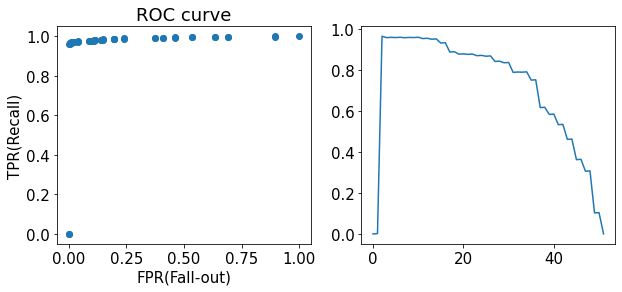

In [59]:
import numpy as np

# roc_curve(타겟값, prob of 1)
y_pred_proba = pipe_cb.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
# print(roc)

# roc 시각화
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(121)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

# 최적의 threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)

# auc 시각화
plt.subplot(122)
plt.plot(tpr-fpr);

## 3.3 해석
### 3.3.1 Feature Importance

In [63]:
model = pipe_cb

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

Learning rate set to 0.072338
0:	learn: 0.4761113	total: 27.7ms	remaining: 27.7s
1:	learn: 0.3245923	total: 36ms	remaining: 18s
2:	learn: 0.2228547	total: 43.8ms	remaining: 14.6s
3:	learn: 0.1559742	total: 51.5ms	remaining: 12.8s
4:	learn: 0.1112751	total: 59ms	remaining: 11.7s
5:	learn: 0.0805746	total: 66.9ms	remaining: 11.1s
6:	learn: 0.0601000	total: 74.3ms	remaining: 10.5s
7:	learn: 0.0462024	total: 81.6ms	remaining: 10.1s
8:	learn: 0.0361509	total: 88.6ms	remaining: 9.76s
9:	learn: 0.0291332	total: 95.9ms	remaining: 9.5s
10:	learn: 0.0240195	total: 103ms	remaining: 9.29s
11:	learn: 0.0203180	total: 111ms	remaining: 9.12s
12:	learn: 0.0175100	total: 118ms	remaining: 8.95s
13:	learn: 0.0155393	total: 124ms	remaining: 8.76s
14:	learn: 0.0139486	total: 131ms	remaining: 8.61s
15:	learn: 0.0126796	total: 139ms	remaining: 8.54s
16:	learn: 0.0117382	total: 146ms	remaining: 8.44s
17:	learn: 0.0109225	total: 153ms	remaining: 8.37s
18:	learn: 0.0103238	total: 161ms	remaining: 8.31s
19:	lear

180:	learn: 0.0053015	total: 1.38s	remaining: 6.26s
181:	learn: 0.0052995	total: 1.39s	remaining: 6.26s
182:	learn: 0.0052938	total: 1.4s	remaining: 6.25s
183:	learn: 0.0052806	total: 1.41s	remaining: 6.25s
184:	learn: 0.0052687	total: 1.42s	remaining: 6.24s
185:	learn: 0.0052608	total: 1.42s	remaining: 6.23s
186:	learn: 0.0052581	total: 1.43s	remaining: 6.22s
187:	learn: 0.0052482	total: 1.44s	remaining: 6.21s
188:	learn: 0.0052450	total: 1.45s	remaining: 6.2s
189:	learn: 0.0052406	total: 1.45s	remaining: 6.19s
190:	learn: 0.0052294	total: 1.46s	remaining: 6.18s
191:	learn: 0.0052271	total: 1.47s	remaining: 6.17s
192:	learn: 0.0052233	total: 1.47s	remaining: 6.17s
193:	learn: 0.0052127	total: 1.48s	remaining: 6.16s
194:	learn: 0.0052074	total: 1.49s	remaining: 6.15s
195:	learn: 0.0052038	total: 1.5s	remaining: 6.14s
196:	learn: 0.0051968	total: 1.5s	remaining: 6.13s
197:	learn: 0.0051954	total: 1.51s	remaining: 6.13s
198:	learn: 0.0051797	total: 1.52s	remaining: 6.12s
199:	learn: 0.00

339:	learn: 0.0044967	total: 2.57s	remaining: 4.99s
340:	learn: 0.0044957	total: 2.58s	remaining: 4.98s
341:	learn: 0.0044890	total: 2.58s	remaining: 4.97s
342:	learn: 0.0044884	total: 2.59s	remaining: 4.96s
343:	learn: 0.0044807	total: 2.6s	remaining: 4.96s
344:	learn: 0.0044754	total: 2.61s	remaining: 4.95s
345:	learn: 0.0044725	total: 2.62s	remaining: 4.94s
346:	learn: 0.0044691	total: 2.62s	remaining: 4.94s
347:	learn: 0.0044641	total: 2.63s	remaining: 4.93s
348:	learn: 0.0044623	total: 2.64s	remaining: 4.92s
349:	learn: 0.0044563	total: 2.65s	remaining: 4.91s
350:	learn: 0.0044554	total: 2.65s	remaining: 4.91s
351:	learn: 0.0044495	total: 2.66s	remaining: 4.9s
352:	learn: 0.0044481	total: 2.67s	remaining: 4.89s
353:	learn: 0.0044450	total: 2.68s	remaining: 4.88s
354:	learn: 0.0044396	total: 2.69s	remaining: 4.88s
355:	learn: 0.0044385	total: 2.69s	remaining: 4.87s
356:	learn: 0.0044360	total: 2.7s	remaining: 4.87s
357:	learn: 0.0044345	total: 2.71s	remaining: 4.86s
358:	learn: 0.0

498:	learn: 0.0038292	total: 3.75s	remaining: 3.77s
499:	learn: 0.0038228	total: 3.76s	remaining: 3.76s
500:	learn: 0.0038195	total: 3.77s	remaining: 3.75s
501:	learn: 0.0038188	total: 3.77s	remaining: 3.75s
502:	learn: 0.0038158	total: 3.78s	remaining: 3.74s
503:	learn: 0.0038140	total: 3.79s	remaining: 3.73s
504:	learn: 0.0038113	total: 3.8s	remaining: 3.72s
505:	learn: 0.0038071	total: 3.8s	remaining: 3.71s
506:	learn: 0.0038038	total: 3.81s	remaining: 3.71s
507:	learn: 0.0038007	total: 3.82s	remaining: 3.7s
508:	learn: 0.0037986	total: 3.83s	remaining: 3.69s
509:	learn: 0.0037970	total: 3.83s	remaining: 3.68s
510:	learn: 0.0037962	total: 3.84s	remaining: 3.68s
511:	learn: 0.0037957	total: 3.85s	remaining: 3.67s
512:	learn: 0.0037954	total: 3.86s	remaining: 3.66s
513:	learn: 0.0037911	total: 3.86s	remaining: 3.65s
514:	learn: 0.0037883	total: 3.87s	remaining: 3.65s
515:	learn: 0.0037844	total: 3.88s	remaining: 3.64s
516:	learn: 0.0037811	total: 3.89s	remaining: 3.63s
517:	learn: 0.0

659:	learn: 0.0031161	total: 4.95s	remaining: 2.55s
660:	learn: 0.0031154	total: 4.96s	remaining: 2.54s
661:	learn: 0.0031117	total: 4.97s	remaining: 2.54s
662:	learn: 0.0030991	total: 4.98s	remaining: 2.53s
663:	learn: 0.0030960	total: 4.98s	remaining: 2.52s
664:	learn: 0.0030960	total: 4.99s	remaining: 2.51s
665:	learn: 0.0030960	total: 4.99s	remaining: 2.5s
666:	learn: 0.0030959	total: 5s	remaining: 2.5s
667:	learn: 0.0030959	total: 5s	remaining: 2.49s
668:	learn: 0.0030959	total: 5.01s	remaining: 2.48s
669:	learn: 0.0030956	total: 5.02s	remaining: 2.47s
670:	learn: 0.0030953	total: 5.03s	remaining: 2.46s
671:	learn: 0.0030938	total: 5.03s	remaining: 2.46s
672:	learn: 0.0030938	total: 5.04s	remaining: 2.45s
673:	learn: 0.0030894	total: 5.04s	remaining: 2.44s
674:	learn: 0.0030894	total: 5.05s	remaining: 2.43s
675:	learn: 0.0030859	total: 5.06s	remaining: 2.42s
676:	learn: 0.0030826	total: 5.06s	remaining: 2.42s
677:	learn: 0.0030822	total: 5.07s	remaining: 2.41s
678:	learn: 0.003079

827:	learn: 0.0027154	total: 6.15s	remaining: 1.28s
828:	learn: 0.0027052	total: 6.16s	remaining: 1.27s
829:	learn: 0.0027048	total: 6.17s	remaining: 1.26s
830:	learn: 0.0027048	total: 6.17s	remaining: 1.25s
831:	learn: 0.0027036	total: 6.18s	remaining: 1.25s
832:	learn: 0.0027031	total: 6.19s	remaining: 1.24s
833:	learn: 0.0027029	total: 6.2s	remaining: 1.23s
834:	learn: 0.0027028	total: 6.2s	remaining: 1.23s
835:	learn: 0.0027028	total: 6.21s	remaining: 1.22s
836:	learn: 0.0027028	total: 6.21s	remaining: 1.21s
837:	learn: 0.0026997	total: 6.22s	remaining: 1.2s
838:	learn: 0.0026982	total: 6.23s	remaining: 1.2s
839:	learn: 0.0026977	total: 6.24s	remaining: 1.19s
840:	learn: 0.0026967	total: 6.24s	remaining: 1.18s
841:	learn: 0.0026878	total: 6.25s	remaining: 1.17s
842:	learn: 0.0026722	total: 6.26s	remaining: 1.17s
843:	learn: 0.0026698	total: 6.27s	remaining: 1.16s
844:	learn: 0.0026665	total: 6.28s	remaining: 1.15s
845:	learn: 0.0026642	total: 6.28s	remaining: 1.14s
846:	learn: 0.00

989:	learn: 0.0022119	total: 7.36s	remaining: 74.3ms
990:	learn: 0.0022092	total: 7.37s	remaining: 66.9ms
991:	learn: 0.0022056	total: 7.38s	remaining: 59.5ms
992:	learn: 0.0022041	total: 7.38s	remaining: 52.1ms
993:	learn: 0.0021997	total: 7.39s	remaining: 44.6ms
994:	learn: 0.0021976	total: 7.4s	remaining: 37.2ms
995:	learn: 0.0021952	total: 7.41s	remaining: 29.7ms
996:	learn: 0.0021923	total: 7.41s	remaining: 22.3ms
997:	learn: 0.0021865	total: 7.42s	remaining: 14.9ms
998:	learn: 0.0021863	total: 7.43s	remaining: 7.44ms
999:	learn: 0.0021833	total: 7.44s	remaining: 0us


In [64]:
#특성중요도 확인

tf = train[features]

importances = pd.Series(model.feature_importances_, tf.columns)
plt.figure(figsize=(7,10))
importances.sort_values().plot.barh();

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

### 3.3.2 Permutation Importance

In [49]:
!pip install eli5

In [60]:
from sklearn.pipeline import Pipeline

# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['AIRLINE', 'TAIL_NUMBER',
                                                       'ORIGIN_AIRPORT',
                                                       'DESTINATION_AIRPORT'],
                                                 mapping=[{'col': 'AIRLINE',
                                                           'data_type': dtype('O'),
                                                           'mapping': DL      1
AA      2
US      3
WN      4
OO      5
NK      6
HA      7
MQ      8
UA      9
EV     10
B6     11
AS     12
VX     13
F9     14
NaN    -2
dtype: int64},
                                                          {'col': 'TAIL_NUMBER',
                                                           'data_type': dtype('O'),
                                                           'mapping': N912DN       1
N434AA       2
N203UW...
          

In [61]:
import eli5
from eli5.sklearn import PermutationImportance
warnings.simplefilter(action='ignore', category=FutureWarning)

#permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#permuter 계산은 preprocessing 된 X_val을 사용
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

#실제로 fit 의미보다는 스코어를 다시 계산하는 작업
permuter.fit(X_val_transformed, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

DEPARTURE_TIME         0.050050
DEPARTURE_DELAY        0.000767
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
SCHEDULED_TIME         0.000000
DISTANCE               0.000000
DIVERTED               0.000000
dtype: float64

In [62]:
#특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, #top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names #list 형식으로 넣어야 함
)

Weight,Feature
0.0500 ± 0.0010,DEPARTURE_TIME
0.0008 ± 0.0002,DEPARTURE_DELAY
0 ± 0.0000,DIVERTED
0 ± 0.0000,DISTANCE
0 ± 0.0000,SCHEDULED_TIME
0 ± 0.0000,SCHEDULED_DEPARTURE
0 ± 0.0000,DESTINATION_AIRPORT
0 ± 0.0000,ORIGIN_AIRPORT
0 ± 0.0000,TAIL_NUMBER
0 ± 0.0000,FLIGHT_NUMBER


- 항공기 결항에는 결항 사유와 출발 시간이 제일 큰 영향을 미침을 알 수 있음
### 3.3.2 SHAP

In [ ]:
!pip install shap
!pip install pdpbox

In [ ]:
!pip install -U matplotlib

In [ ]:
import shap

model = RandomForestClassifier().fit(X_train, y_train)
scaled_model

row = X_train.iloc[[1]]

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, X_train.iloc[:100])